Load the two datasets: *user_data* and *logs*. Check the size of the tables, the types of variables, and look at the descriptive statistics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

user_data = pd.read_csv('3_user_data.csv')
logs = pd.read_csv('3_logs.csv')
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [2]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


How many unique values does the variable *platform* take?

In [3]:
logs.platform.nunique()

3

Which client performed the most successful transactions?

In [4]:
success_counts = (logs
                    .loc[logs.success == True]
                    .client.value_counts())

In [5]:
success_counts

client
28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: count, Length: 2845, dtype: int64

In [6]:
max_num = success_counts.max()

In [7]:
max_success_uses = success_counts.loc[success_counts == max_num]

In [8]:
max_success_uses 

client
28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: count, dtype: int64

In [9]:
max_success_uses.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

From which platform is the highest number of successful transactions made

In [10]:
(logs
    .loc[logs.success == True]
    .platform.value_counts()
    .idxmax())

'phone'

Which platform is the most popular among premium clients?

In [11]:
premium_logs = user_data.merge(logs, on = 'client')

In [12]:
premium_logs.loc[premium_logs.premium == True].platform.value_counts().idxmax()

'phone'

Visualize the distribution of customer ages based on the type of client (regular or premium)

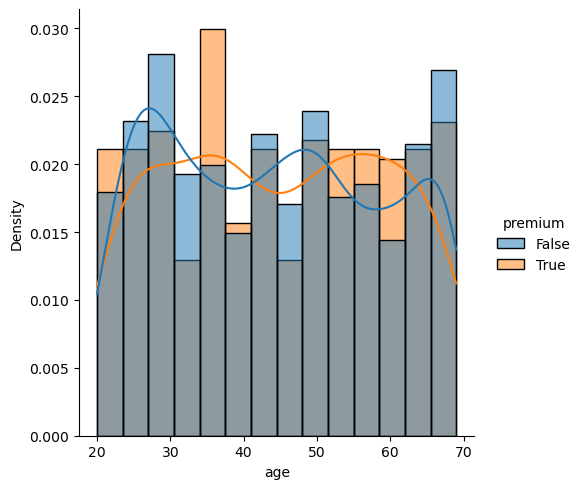

In [13]:
sns.displot(data=premium_logs, x='age', hue='premium', kde=True, stat='density', 
            common_norm=False, bins = 14)

Create a plot showing the distribution of the number of successful transactions

In [14]:
success_counts = success_counts.rename('successes')

<Axes: xlabel='successes', ylabel='count'>

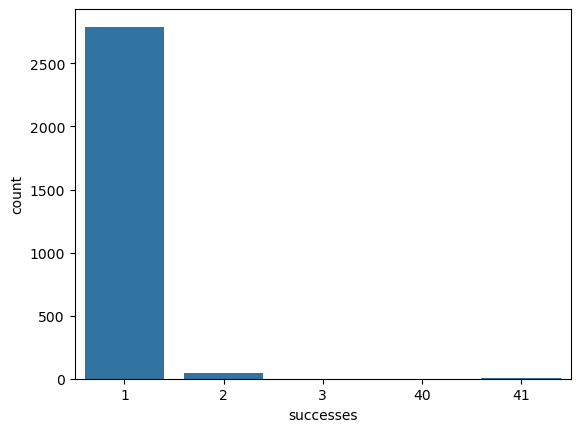

In [15]:
sns.countplot(x = success_counts)

Visualize the number of successful transactions made on the *computer* platform based on age

<Axes: xlabel='age', ylabel='count'>

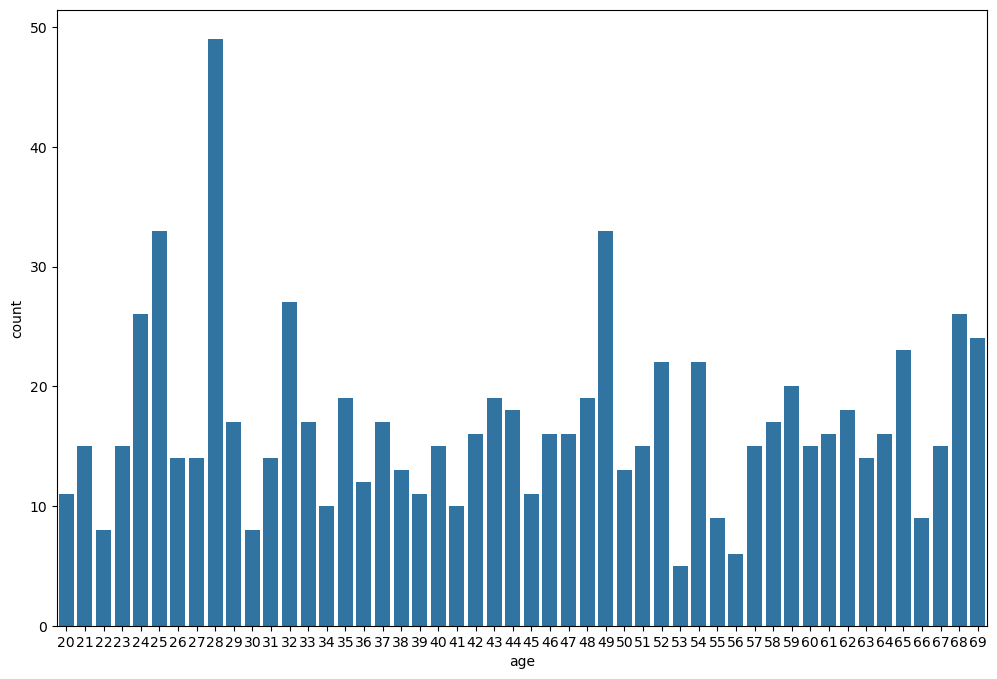

In [16]:
plt.figure(figsize=(12, 8))
sns.countplot(data = premium_logs.loc[(premium_logs.platform == 'computer')
                                       & (premium_logs.success == True)],
              x = 'age')